# K Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Importing the dataset



In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Practicals/iot_telemetry_data.csv')
X = dataset.iloc[:, [3, 5, 8]].values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

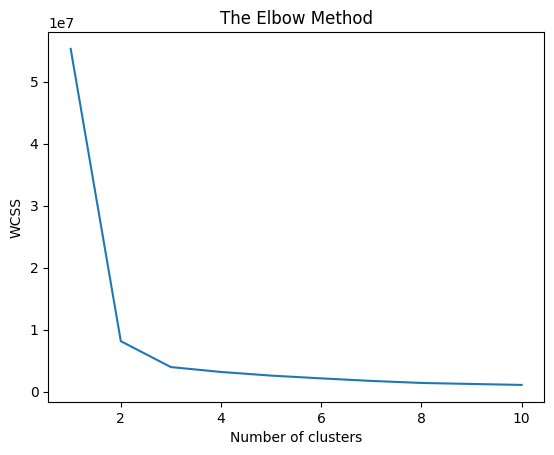

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[1 0 1 ... 0 0 1]


## User input for prediction

In [ ]:
new_humidity = float(input("Enter Humidity: "))
new_lpg = float(input("Enter LPG: "))
new_temperature = float(input("Enter Temperature: "))

Enter Humidity: 50
Enter LPG: 0.02281
Enter Temperature: 27


## Predicting the cluster for the user input

In [ ]:
new_data_point = np.array([[new_humidity, new_lpg, new_temperature]])
predicted_cluster = kmeans.predict(new_data_point)

## Display the predicted cluster

In [ ]:
print(f'The input belongs to Cluster {predicted_cluster[0]}')

The input belongs to Cluster 1


In [ ]:
if predicted_cluster[0] == 1:
  if (new_humidity >= 40 and new_humidity <= 60) and (new_temperature >= 25 and new_temperature <= 30) and (new_lpg >= 0.02):
    print("Gas Leakage Detected")

Gas Leakage Detected


## Visualising the clusters [2D]

In [ ]:
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of Gas Leakage')
# plt.xlabel('Humidity')
# plt.ylabel('LPG')
# plt.legend()
# plt.show()

## Visualising the clusters [3D]

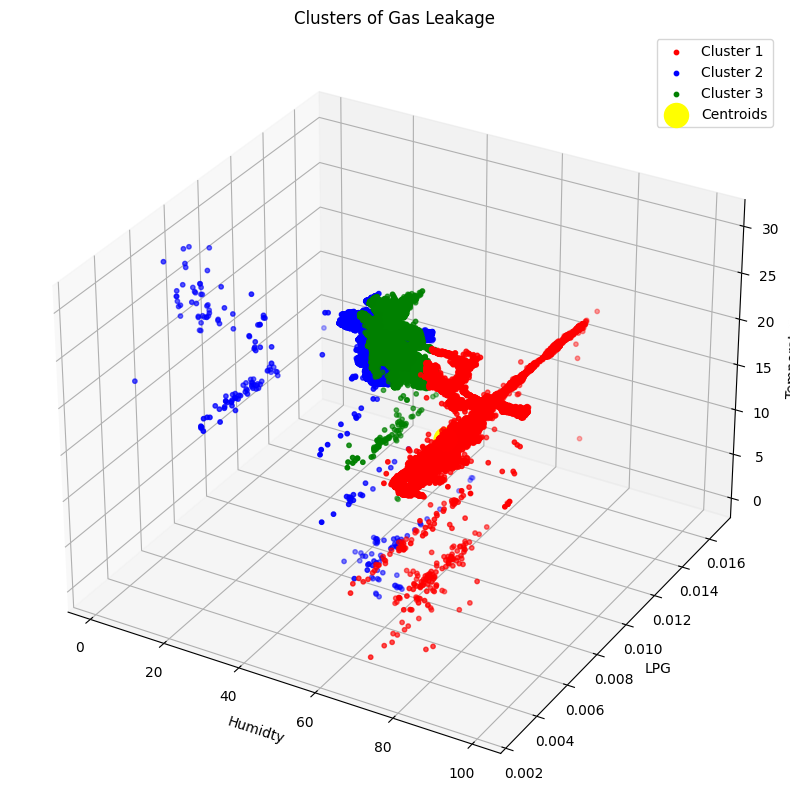

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s=10, c='red', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s=10, c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s=10, c='green', label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
ax.set_title('Clusters of Gas Leakage')
ax.set_xlabel('Humidty')
ax.set_ylabel('LPG')
ax.set_zlabel('Temperature')
ax.legend()
plt.show()

# DBSCAN Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Practicals/iot_telemetry_data.csv')
X = dataset.iloc[:, [3, 5, 8]].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

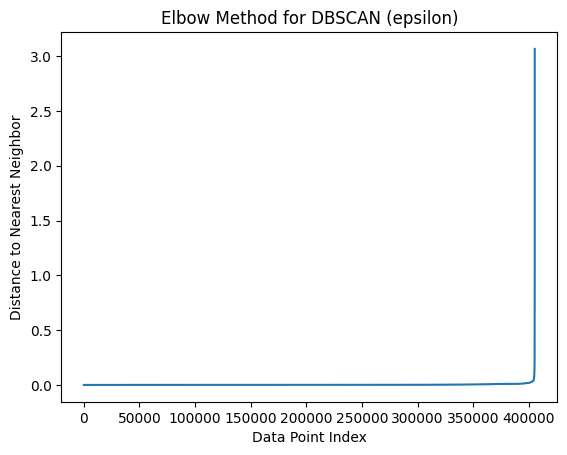

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
distances, indices = neighbors.fit(X_scaled).kneighbors(X_scaled)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(range(1, len(distances) + 1), distances)
plt.title('Elbow Method for DBSCAN (epsilon)')
plt.xlabel('Data Point Index')
plt.ylabel('Distance to Nearest Neighbor')
plt.show()

In [ ]:
epsilon = 1.5
dbscan = DBSCAN(eps=epsilon, min_samples=3)
y_dbscan = dbscan.fit(X_scaled)

In [ ]:
new_humidity = float(input("Enter Humidity: "))
new_lpg = float(input("Enter LPG: "))
new_temperature = float(input("Enter Temperature:"))

new_data_point = scaler.transform(np.array([[new_humidity, new_lpg, new_temperature]]))
predicted_cluster = dbscan.predict(new_data_point)

In [ ]:
print(f'The input belongs to Cluster {predicted_cluster[0]}')

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[y_dbscan == 0, 0], X_scaled[y_dbscan == 0, 1], X_scaled[y_dbscan == 0, 2], s=10, c='red', label='Cluster 1')
ax.scatter(X_scaled[y_dbscan == 1, 0], X_scaled[y_dbscan == 1, 1], X_scaled[y_dbscan == 1, 2], s=10, c='blue', label='Cluster 2')
ax.scatter(X_scaled[y_dbscan == 2, 0], X_scaled[y_dbscan == 2, 1], X_scaled[y_dbscan == 2, 2], s=10, c='green', label='Cluster 3')
ax.scatter(new_data_point[0, 0], new_data_point[0, 1], new_data_point[0, 2], s=200, c='black', marker='x', label='New Data Point')
ax.set_title('Clusters of Gas Leakage (DBSCAN)')
ax.set_xlabel('Humidity')
ax.set_ylabel('LPG')
ax.set_zlabel('Temperature')
ax.legend()
plt.show()